In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

In [4]:
trdata = ImageDataGenerator(rescale=1/255) #to rescale
        
train_generator = trdata.flow_from_directory(directory="/content/drive/MyDrive/5-slices/train",target_size=(224,224))
tsdata = ImageDataGenerator(rescale=1/255) #to rescale
    
validation_generator = tsdata.flow_from_directory(directory="/content/drive/MyDrive/5-slices/test", target_size=(224,224))

Found 20794 images belonging to 2 classes.
Found 5265 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [6]:
model.add(Flatten())
model.add(Dense(units=2, activation="sigmoid"))

In [7]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
metric = 'accuracy'
checkpoint = ModelCheckpoint("vgg16_3.h5", monitor = metric , verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(min_delta=0, patience=20, verbose=1, mode='auto')
# hist = model.fit_generator(steps_per_epoch=20,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
history = model.fit(train_generator,steps_per_epoch=10,epochs=30,validation_data = validation_generator,validation_steps=10, callbacks=[checkpoint,early])
# for key in hist.history:
#   print(key)

Epoch 1/30

Epoch 1: accuracy improved from -inf to 0.90625, saving model to vgg16_3.h5
 1/10 [==>...........................] - ETA: 2:37 - loss: 0.6923 - accuracy: 0.9062 - recall: 0.9375 - true_positives: 30.0000 - true_negatives: 29.0000 - false_positives: 3.0000 - false_negatives: 2.0000
Epoch 1: accuracy did not improve from 0.90625
 2/10 [=====>........................] - ETA: 3s - loss: 1.7528 - accuracy: 0.8906 - recall: 0.9062 - true_positives: 58.0000 - true_negatives: 57.0000 - false_positives: 7.0000 - false_negatives: 6.0000  
Epoch 1: accuracy did not improve from 0.90625
 3/10 [========>.....................] - ETA: 20s - loss: 1.3956 - accuracy: 0.8854 - recall: 0.8958 - true_positives: 86.0000 - true_negatives: 85.0000 - false_positives: 11.0000 - false_negatives: 10.0000
Epoch 1: accuracy did not improve from 0.90625
 4/10 [===========>..................] - ETA: 22s - loss: 1.2162 - accuracy: 0.8672 - recall: 0.8750 - true_positives: 112.0000 - true_negatives: 111.00

In [10]:
model.evaluate(validation_generator)

165/165 [==============================] - 82s 497ms/step - loss: 0.4019 - accuracy: 0.8663 - recall: 0.8663 - true_positives: 4561.0000 - true_negatives: 4561.0000 - false_positives: 704.0000 - false_negatives: 704.0000


[0.40194520354270935,
 0.8662868142127991,
 0.8662868142127991,
 4561.0,
 4561.0,
 704.0,
 704.0]

In [11]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,verbose=1)

165/165 [==============================] - 24s 143ms/step


In [33]:
preds

array([[0.24265532, 0.756631  ],
       [0.24265532, 0.75663096],
       [0.24265532, 0.75663096],
       ...,
       [0.24265535, 0.75663096],
       [0.24265532, 0.75663096],
       [0.24265532, 0.75663096]], dtype=float32)

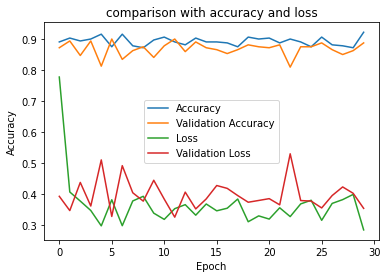

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("comparison with accuracy and loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

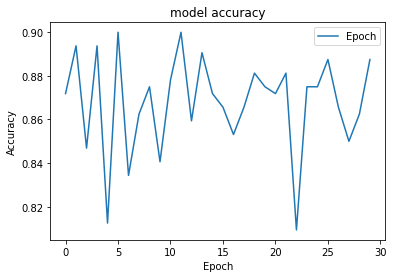

In [18]:
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Epoch","Validation Accuracy"])
plt.show()

In [36]:
vals = model.evaluate(validation_generator)

165/165 [==============================] - 24s 144ms/step - loss: 0.4019 - accuracy: 0.8663 - recall: 0.8663 - true_positives: 4561.0000 - true_negatives: 4561.0000 - false_positives: 704.0000 - false_negatives: 704.0000


In [37]:
vals

[0.4019453227519989,
 0.8662868142127991,
 0.8662868142127991,
 4561.0,
 4561.0,
 704.0,
 704.0]

In [38]:
tp = vals[3]
tn = vals[4]
fp = vals[5]
fn = vals[6]

In [39]:
def conf_matrix(tp, tn, fp, fn):
  print('            True ','\t  False')
  print('Positive  ', str(tp), '\t '+ str(fp))
  print('Negative  ', str(fn), '\t ' + str(tn))

In [40]:
conf_matrix(tp, tn, fp, fn)

            True  	  False
Positive   4561.0 	 704.0
Negative   704.0 	 4561.0


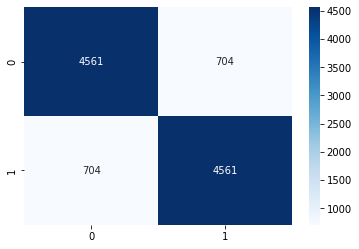

In [41]:
import seaborn as sns
cm_data = [[int(tn), int(fp)], [int(fn), int(tp)]]
sns.heatmap(cm_data, annot=True, cmap='Blues', fmt='d')
plt.show()

In [42]:
Accuracy = (tp+tn)/(tp+tn+fp+fn)
Precision = tp / (tp+fp)
Recall = tp / (tp+fn)
F1_Score = 2 * ((Precision*Recall)/(Precision+Recall))

In [43]:
print('Accuracy : ',Accuracy)
print('Precision: ',Precision)
print('Recall   : ',Recall)
print('F1_Score : ',F1_Score)

Accuracy :  0.866286799620133
Precision:  0.866286799620133
Recall   :  0.866286799620133
F1_Score :  0.866286799620133


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

Saving pd.png to pd (2).png
[0.24264945 0.75663626]
pd.png is a pd


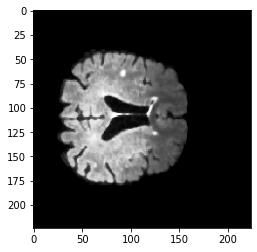

In [51]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0][0]<0.5:
    print(fn + " is a pd")
  else:
    print(fn + " is hc")

Saving heal.png to heal (1).png
[0.71663624 0.28336373]
heal.png is hc


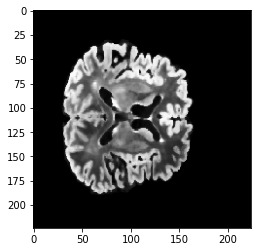

In [52]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0][0]<0.5:
    print(fn + " is a pd")
  else:
    print(fn + " is hc")